In [1]:
# Load Pandas into Python
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Dataset

- Amazon Fine Food Reviews dataset
- Number of reviews: 568,454
- Number of users: 256,059
- Number of products: 74,258
- Timespan: Oct 1999 - Oct 2012
- Number of Attributes/Columns in data: 10


In [3]:
# Read Amazon Fine Food Review
csv_path = 'Data/Raw/amazon_fine_food_reviews.csv'
reviews = pd.read_csv(csv_path)

In [5]:
reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [9]:
import datetime
datetime.datetime.fromtimestamp(reviews.loc[0,'Time'])

datetime.datetime(2011, 4, 27, 2, 0)

In [10]:
# Scores are highly unbalanced, as '5' is much greater than others
reviews.Score.value_counts(sort=False)

5    363122
1     52268
4     80655
2     29769
3     42640
Name: Score, dtype: int64

In [11]:
# Check specs match a Dataset
print("Num of reviews: ", len(reviews))
print("Number of different products: ", len(reviews.groupby('ProductId').count()))
print("Number of different users: ", len(reviews.groupby('UserId').count()))
print("Num of cols: ", len(reviews.columns))

Num of reviews:  568454
Number of different products:  74258
Number of different users:  256059
Num of cols:  10


In [14]:
reviews.rename(columns={"UserId": "user_id", "ProfileName": "prof_name", 'HelpfulnessNumerator': "help_num",
                        'HelpfulnessDenominator':'help_dom', 'Score': 'score', 'Time': 'time', "Summary": "summary", "Text": "text",
                        "Id": "id", "ProductId": "prod_id"}, inplace=True)

C:\Users\jordi.burgues.miro\AppData\Local\Temp\ipykernel_23696\3123467050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews.rename(columns={"UserId": "user_id", "ProfileName": "prof_name", 'HelpfulnessNumerator': "help_num",


In [15]:
# Just for numeric columns
reviews.describe()

,id,help_num,help_dom,score,time
count,525814.000000,525814.000000,525814.000000,525814.000000,5.258140e+05
mean,284599.060038,1.747293,2.209544,4.279148,1.295943e+09
std,163984.038077,7.575819,8.195329,1.316725,4.828129e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142730.250000,0.000000,0.000000,4.000000,1.270598e+09
50%,284989.500000,0.000000,1.000000,5.000000,1.310861e+09
75%,426446.750000,2.000000,2.000000,5.000000,1.332634e+09
max,568454.000000,866.000000,878.000000,5.000000,1.351210e+09


<Axes: >

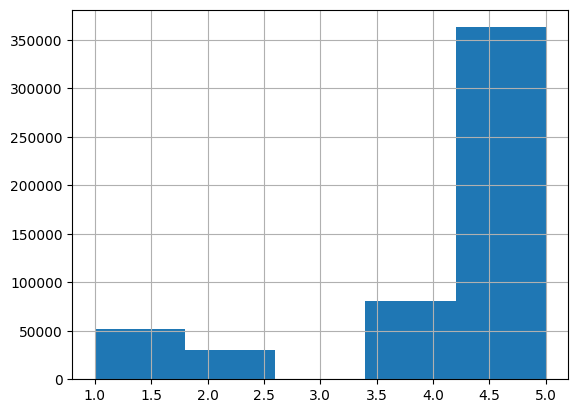

In [16]:
reviews.score.hist(bins=5)

## Azure authentication and remaining dependencies


In [94]:
!az login

[
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "cf36141c-ddd7-45a7-b073-111f66d0b30c",
    "id": "235cc5b8-77c0-4b3c-9730-9c2a83f8400b",
    "isDefault": false,
    "managedByTenants": [],
    "name": "Visual Studio Professional Subscription",
    "state": "Enabled",
    "tenantId": "cf36141c-ddd7-45a7-b073-111f66d0b30c",
    "user": {
      "name": "jordi.burgues.miro@avanade.com",
      "type": "user"
    }
  },
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "cf36141c-ddd7-45a7-b073-111f66d0b30c",
    "id": "bec89544-8dd5-4d70-b6ae-422c8feb0a4a",
    "isDefault": true,
    "managedByTenants": [],
    "name": "Visual Studio Enterprise Subscription",
    "state": "Enabled",
    "tenantId": "cf36141c-ddd7-45a7-b073-111f66d0b30c",
    "user": {
      "name": "jordi.burgues.miro@avanade.com",
      "type": "user"
    }
  }
]


In [98]:
!pip install dotenv

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [76 lines of output]
      C:\Users\jordi.burgues.miro\AppData\Local\anaconda3\envs\test_env\lib\site-packages\setuptools\__init__.py:80: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
      !!
      
              ********************************************************************************
              Requirements should be satisfied by a PEP 517 installer.
              If you are using pip, you can try `pip install --use-pep517`.
              ********************************************************************************
      
      !!
        dist.fetch_build_eggs(dist.setup_requires)
        error: subprocess-exited-with-error
      
        × python setup.py egg_info did not run successfully.
        │ exit code: 1
        ╰─> [16 lines of output]
            Traceback (most recent call last):
              File "<string>

## Language Service


In [160]:
# Grab text reviews str from the df and put them in a list
list_text_review = list(reviews.text.values)

In [161]:
# Get environment variables of Language Endpoint and Key
import os
from dotenv import load_dotenv

load_dotenv()

from azure.core.credentials import AzureKeyCredential
from azure.ai.textanalytics import TextAnalyticsClient

endpoint = os.environ["AZURE_LANGUAGE_ENDPOINT"]
key = os.environ["AZURE_LANGUAGE_KEY"]

text_analytics_client = TextAnalyticsClient(endpoint=endpoint, credential=AzureKeyCredential(key))

In [163]:
result = text_analytics_client.analyze_sentiment(list_text_review[4:6], show_opinion_mining=True)
docs = [doc for doc in result if not doc.is_error]

print("Let's visualize the sentiment of each of these documents")
for idx, doc in enumerate(docs):
    print(f"Document text: {list_text_review[idx]}")
    print(f"Overall sentiment: {doc.sentiment}")

Let's visualize the sentiment of each of these documents
Document text: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Overall sentiment: positive
Document text: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
Overall sentiment: mixed
